<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             100 non-null    int64 
 1   Gender          100 non-null    object
 2   Cholesterol     100 non-null    int64 
 3   Blood Pressure  100 non-null    int64 
 4   Heart Disease   100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB
None
   Age  Gender  Cholesterol  Blood Pressure  Heart Disease
0   68    Male          277             103              0
1   58  Female          241             110              0
2   44    Male          278             137              0
3   72  Female          270             109              1
4   37  Female          176              97              0
Confusion Matrix:
 [[14  4]
 [ 1  1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.78      0.85        18
         

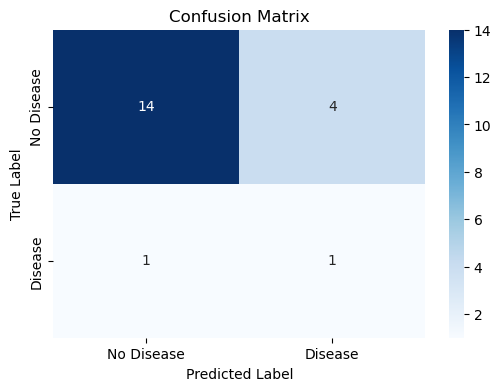

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("heart_disease.csv")

# Display basic info
print(df.info())
print(df.head())

# Handle missing values
df.dropna(inplace=True)

# Convert categorical variables if necessary
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Define features and target variable
X = df[['Age', 'Gender', 'Cholesterol', 'Blood Pressure']]
y = df['Heart Disease']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualizing the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
